In [ ]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import logging 
logging.basicConfig(level=logging.INFO)

In [1]:
from regridding_functions import read_and_average_era5_marta
from regridding_functions import read_and_average_cmip
mean_rsds_era5_BOC=read_and_average_era5_marta('influx_direct')
mean_rsdsdiff_era5_BOC=read_and_average_era5_marta('influx_diffuse')

/home/s233224/anaconda3/envs/atlite_cmip6_2025/lib/python3.13/site-packages/esmpy/interface/loadESMF.py:94: VersionWarning: ESMF installation version 8.8.0, ESMPy version 8.8.0b0
  warnings.warn("ESMF installation version {}, ESMPy version {}".format(


['/groups/EXTREMES/cutouts/europe-1980-era5.nc', '/groups/EXTREMES/cutouts/europe-1981-era5.nc', '/groups/EXTREMES/cutouts/europe-1982-era5.nc', '/groups/EXTREMES/cutouts/europe-1983-era5.nc', '/groups/EXTREMES/cutouts/europe-1984-era5.nc', '/groups/EXTREMES/cutouts/europe-1985-era5.nc', '/groups/EXTREMES/cutouts/europe-1986-era5.nc', '/groups/EXTREMES/cutouts/europe-1987-era5.nc', '/groups/EXTREMES/cutouts/europe-1988-era5.nc', '/groups/EXTREMES/cutouts/europe-1989-era5.nc', '/groups/EXTREMES/cutouts/europe-1990-era5.nc', '/groups/EXTREMES/cutouts/europe-1991-era5.nc', '/groups/EXTREMES/cutouts/europe-1992-era5.nc', '/groups/EXTREMES/cutouts/europe-1993-era5.nc', '/groups/EXTREMES/cutouts/europe-1994-era5.nc', '/groups/EXTREMES/cutouts/europe-1995-era5.nc', '/groups/EXTREMES/cutouts/europe-1996-era5.nc', '/groups/EXTREMES/cutouts/europe-1997-era5.nc', '/groups/EXTREMES/cutouts/europe-1998-era5.nc', '/groups/EXTREMES/cutouts/europe-1999-era5.nc', '/groups/EXTREMES/cutouts/europe-2000-e

In [7]:
mean_rsds_model_BOC=read_and_average_cmip('SFCRAD/CanESM5/historical/r1i1p2f1/',"rsds")
mean_rsdsdiff_model_BOC=read_and_average_cmip('SFCRAD/CanESM5/historical/r1i1p2f1/',"rsdsdiff")

['/groups/FutureWind/SFCRAD/CanESM5/historical/r1i1p2f1/rsds_rsdsdiff_tas_1980.nc', '/groups/FutureWind/SFCRAD/CanESM5/historical/r1i1p2f1/rsds_rsdsdiff_tas_1981.nc', '/groups/FutureWind/SFCRAD/CanESM5/historical/r1i1p2f1/rsds_rsdsdiff_tas_1982.nc', '/groups/FutureWind/SFCRAD/CanESM5/historical/r1i1p2f1/rsds_rsdsdiff_tas_1983.nc', '/groups/FutureWind/SFCRAD/CanESM5/historical/r1i1p2f1/rsds_rsdsdiff_tas_1984.nc', '/groups/FutureWind/SFCRAD/CanESM5/historical/r1i1p2f1/rsds_rsdsdiff_tas_1985.nc', '/groups/FutureWind/SFCRAD/CanESM5/historical/r1i1p2f1/rsds_rsdsdiff_tas_1986.nc', '/groups/FutureWind/SFCRAD/CanESM5/historical/r1i1p2f1/rsds_rsdsdiff_tas_1987.nc', '/groups/FutureWind/SFCRAD/CanESM5/historical/r1i1p2f1/rsds_rsdsdiff_tas_1988.nc', '/groups/FutureWind/SFCRAD/CanESM5/historical/r1i1p2f1/rsds_rsdsdiff_tas_1989.nc', '/groups/FutureWind/SFCRAD/CanESM5/historical/r1i1p2f1/rsds_rsdsdiff_tas_1990.nc', '/groups/FutureWind/SFCRAD/CanESM5/historical/r1i1p2f1/rsds_rsdsdiff_tas_1991.nc', '/g

In [38]:
# Find the min and max lat/lon for each dataset
lon_min_era5 = mean_rsds_era5_BOC.lon.min().values
lon_max_era5 = mean_rsds_era5_BOC.lon.max().values
lat_min_era5 = mean_rsds_era5_BOC.lat.min().values

lon_min_model = mean_rsds_model_BOC.lon.min().values
lon_max_model = mean_rsds_model_BOC.lon.max().values
lat_min_model = mean_rsds_model_BOC.lat.min().values

# Define the smallest overlapping range
lon_min = max(lon_min_era5, lon_min_model)  # Take the larger of the two minimums
lon_max = min(lon_max_era5, lon_max_model)  # Take the smaller of the two maximums
lat_min = max(lat_min_era5, lat_min_model)  # Take the larger of the two minimums
lat_max = 64.8  # Take the smaller of the two maximums

print(f"Smallest overlapping longitude range: {lon_min} to {lon_max}")
print(f"Smallest overlapping latitude range: {lat_min} to {lat_max}")

# Subset the datasets to the smallest overlapping range
mean_rsds_era5_BOC= mean_rsds_era5_BOC.sel(x=slice(lon_min, lon_max), y=slice(lat_min, lat_max))
mean_rsdsdiff_era5_BOC= mean_rsdsdiff_era5_BOC.sel(x=slice(lon_min, lon_max), y=slice(lat_min, lat_max))

mean_rsds_model_BOC = mean_rsds_model_BOC.sel(lon=slice(lon_min, lon_max), lat=slice(lat_min, lat_max))
mean_rsdsdiff_model_BOC = mean_rsdsdiff_model_BOC.sel(lon=slice(lon_min, lon_max), lat=slice(lat_min, lat_max))


Smallest overlapping longitude range: -11.25 to 33.75
Smallest overlapping latitude range: 34.88252258300781 to 64.8


In [52]:
# Check if the biased_values shape matches lon2d, lat2d
# Get lat/lon values
lon = mean_rsds_model_BOC.lon.values 
lat = mean_rsds_model_BOC.lat.values

lon_era5=mean_rsds_model_BOC.lon.values
lat_era5=mean_rsds_model_BOC.lat.values

# Ensure lon/lat are 2D using meshgrid
# Ensure lon/lat are 2D using meshgrid
lon_edges = np.linspace(lon.min(), lon.max(), mean_rsds_model_BOC.shape[1] )
lat_edges = np.linspace(lat.min(), lat.max(), mean_rsds_model_BOC.shape[0] )
lon2d, lat2d = np.meshgrid(lon_edges, lat_edges)

# Use percentiles to remove outliers
vmin = np.nanpercentile(mean_rsds_model_BOC, 2)  # 2nd percentile (lower bound)
vmax = np.nanpercentile(mean_rsds_model_BOC, 98)  # 98th percentile (upper bound)

lon_min, lon_max = lon.min(), lon.max()
lat_min, lat_max = lat.min(), lat.max()
print(f"Longitude range: {lon_min} to {lon_max}")
print(f"Latitude range: {lat_min} to {lat_max}")

# Create the plot
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})
# Set the exact extent to match the dataset boundaries
ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

# Plot the bias factor (masked)
c = ax.pcolormesh(
    lon2d, lat2d, mean_rsdsdiff_model_BOC,  # Ensure correct shapes
    transform=ccrs.PlateCarree(),
    cmap='coolwarm',  # Colormap for bias factor
    shading='auto',
    vmin=0, vmax=vmax  # Clip extreme outliers
)

# Add map features
ax.coastlines(resolution='10m', linewidth=1)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='white')
ax.set_title("Mean diffuse irradiance (w/m2) for Model, BOC")

gridlines = ax.gridlines(
    draw_labels=True, 
    linewidth=0.5, 
    color='gray', 
    linestyle='--', 
    xlocs=lon, 
    ylocs=lat, 
    x_inline=False, 
    y_inline=False
)
gridlines.top_labels = False  # Disable labels on the top
gridlines.right_labels = False  # Disable labels on the right

# Add colorbar
cbar = fig.colorbar(c, ax=ax, orientation='vertical', label='Irradiance (W/m²)')

plt.show()

Longitude range: -11.25 to 33.75
Latitude range: 34.88252258300781 to 62.787353515625


: 

: 

: 

In [44]:
from regridding_functions import regrid
regridder_mean_rsds_era5_BOC = regrid(mean_rsds_era5_BOC, mean_rsds_model_BOC, method="conservative")
regrid_mean_rsds_era5_BOC=regridder_mean_rsds_era5_BOC(mean_rsds_era5_BOC)


181 182
120 121
17 18
11 12


/home/s233224/anaconda3/envs/atlite_cmip6_2025/lib/python3.13/site-packages/xesmf/frontend.py:718: UserWarning: Using dimensions ('y', 'x') from data variable influx_direct as the horizontal dimensions for the regridding.
  warnings.warn(


Longitude range: -11.25 to 33.75
Latitude range: 34.88252258300781 to 62.787353515625


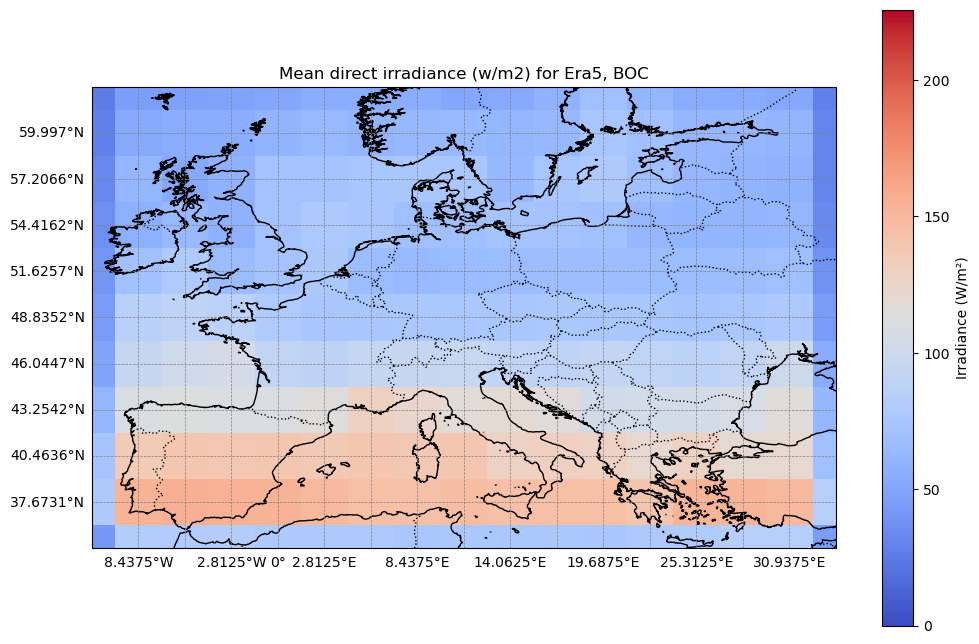

In [45]:
# Check if the biased_values shape matches lon2d, lat2d
# Get lat/lon values
lon = regrid_mean_rsds_era5_BOC.lon.values 
lat = regrid_mean_rsds_era5_BOC.lat.values

# Ensure lon/lat are 2D using meshgrid
# Ensure lon/lat are 2D using meshgrid
lon_edges = np.linspace(lon.min(), lon.max(), regrid_mean_rsds_era5_BOC.shape[1] )
lat_edges = np.linspace(lat.min(), lat.max(), regrid_mean_rsds_era5_BOC.shape[0] )
lon2d, lat2d = np.meshgrid(lon_edges, lat_edges)

# Use percentiles to remove outliers
vmin = np.nanpercentile(regrid_mean_rsds_era5_BOC, 2)  # 2nd percentile (lower bound)
vmax = np.nanpercentile(regrid_mean_rsds_era5_BOC, 98)  # 98th percentile (upper bound)

lon_min, lon_max = lon.min(), lon.max()
lat_min, lat_max = lat.min(), lat.max()
print(f"Longitude range: {lon_min} to {lon_max}")
print(f"Latitude range: {lat_min} to {lat_max}")
# Compute the maximum value for the colorbar explicitly
vmax = max(regrid_mean_rsds_era5_BOC.max().compute(), mean_rsds_model_BOC.max().compute())  # Ensure both are computed

# Create the plot
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})
# Set the exact extent to match the dataset boundaries
ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

# Plot the bias factor (masked)
c = ax.pcolormesh(
    lon2d, lat2d, regrid_mean_rsds_era5_BOC,  # Ensure correct shapes
    transform=ccrs.PlateCarree(),
    cmap='coolwarm',  # Colormap for bias factor
    shading='auto',
    vmin=0, vmax=vmax  # Clip extreme outliers
)

# Add map features
ax.coastlines(resolution='10m', linewidth=1)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='white')
ax.set_title("Mean direct irradiance (w/m2) for Era5, BOC")

gridlines = ax.gridlines(
    draw_labels=True, 
    linewidth=0.5, 
    color='gray', 
    linestyle='--', 
    xlocs=lon, 
    ylocs=lat, 
    x_inline=False, 
    y_inline=False
)
gridlines.top_labels = False  # Disable labels on the top
gridlines.right_labels = False  # Disable labels on the right

# Add colorbar
cbar = fig.colorbar(c, ax=ax, orientation='vertical', label='Irradiance (W/m²)')

plt.show()

In [46]:
numerator_era5_model=regrid_mean_rsds_era5_BOC.values
denominator_era5_model=mean_rsds_model_BOC.values
# Ensure valid bias factor calculation
mask_valid_2 = (denominator_era5_model != 0) & (numerator_era5_model != 0)  # Avoid values 0 
bias_factor_era5_model = np.where(mask_valid_2, numerator_era5_model / denominator_era5_model, np.nan)  # Replace invalid cases with NaN
bias_factor_era5_model

array([[0.20140593, 0.35971296, 0.35506526, 0.37525517, 0.35688296,
        0.36201626, 0.35921362, 0.3312009 , 0.3433456 , 0.34747913,
        0.35629222, 0.3562507 , 0.35832337, 0.35906616, 0.37708065,
        0.3796846 , 0.20003176],
       [0.38534123, 0.71440905, 0.71301705, 0.7010511 , 0.6980372 ,
        0.70410347, 0.71662074, 0.7138517 , 0.71358746, 0.68972856,
        0.6954581 , 0.68619263, 0.6683112 , 0.7364113 , 0.74145025,
        0.77217805, 0.41093844],
       [0.3908594 , 0.71434075, 0.76556516, 0.7557446 , 0.7233482 ,
        0.6593118 , 0.66069907, 0.66061556, 0.6796296 , 0.64843315,
        0.69658077, 0.697334  , 0.64339644, 0.6707038 , 0.61078215,
        0.66362125, 0.4006344 ],
       [0.37532446, 0.6767465 , 0.7047537 , 0.69722104, 0.691107  ,
        0.6640153 , 0.72137076, 0.666888  , 0.6005302 , 0.6220639 ,
        0.6760607 , 0.63629496, 0.6350215 , 0.58955336, 0.56957847,
        0.6170378 , 0.34303957],
       [0.36277324, 0.66864055, 0.6647562 , 0.658295

Longitude range: -11.25 to 33.75
Latitude range: 34.88252258300781 to 62.787353515625


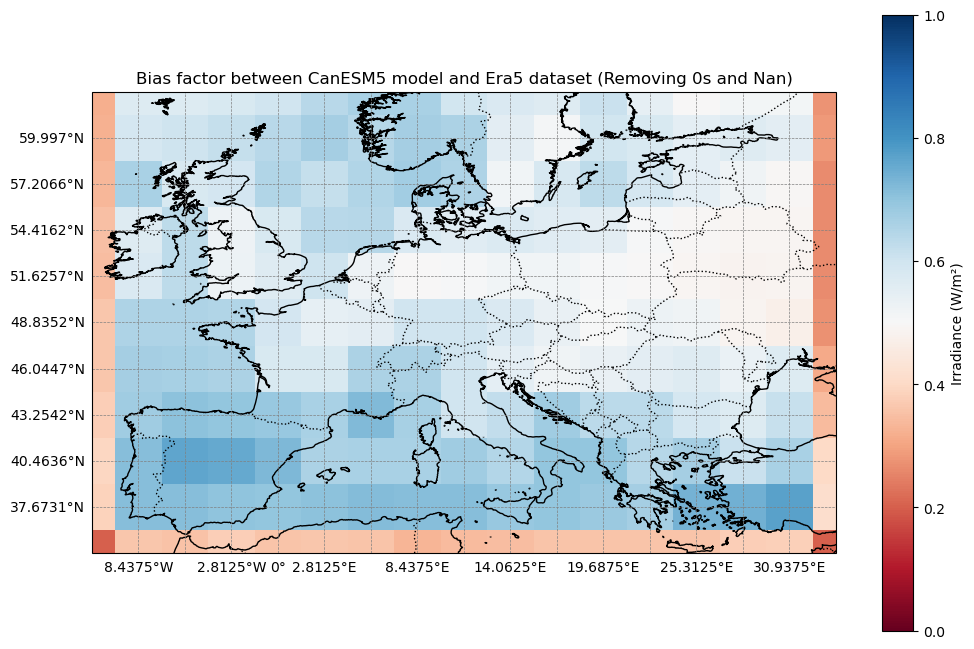

In [49]:
#comparison between model BoC without and with the bias factor
# Check if the biased_values shape matches lon2d, lat2d
# Get lat/lon values
lon = mean_rsds_model_BOC.lon.values 
lat = mean_rsds_model_BOC.lat.values


# Ensure lon/lat are 2D using meshgrid
# Ensure lon/lat are 2D using meshgrid
lon_edges = np.linspace(lon.min(), lon.max(), mean_rsds_model_BOC.shape[1] )
lat_edges = np.linspace(lat.min(), lat.max(), mean_rsds_model_BOC.shape[0] )
lon2d, lat2d = np.meshgrid(lon_edges, lat_edges)

lon_min, lon_max = lon.min(), lon.max()
lat_min, lat_max = lat.min(), lat.max()
print(f"Longitude range: {lon_min} to {lon_max}")
print(f"Latitude range: {lat_min} to {lat_max}")

# Create the plot
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})
# Set the exact extent to match the dataset boundaries
ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

# Plot the bias factor (masked)
c = ax.pcolormesh(
    lon2d, lat2d, bias_factor_era5_model,  # Ensure correct shapes
    transform=ccrs.PlateCarree(),
    cmap='RdBu',  # Colormap for bias factor
    shading='auto', # Clip extreme outliers
    vmin=0, vmax=1
)

# Add map features
ax.coastlines(resolution='10m', linewidth=1)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='white')
ax.set_title("Bias factor between CanESM5 model and Era5 dataset (Removing 0s and Nan)")

gridlines = ax.gridlines(
    draw_labels=True, 
    linewidth=0.5, 
    color='gray', 
    linestyle='--', 
    xlocs=lon, 
    ylocs=lat, 
    x_inline=False, 
    y_inline=False
)
gridlines.top_labels = False  # Disable labels on the top
gridlines.right_labels = False  # Disable labels on the right

# Add colorbar
cbar = fig.colorbar(c, ax=ax, orientation='vertical', label='Irradiance (W/m²)')

plt.show()

In [50]:
print(bias_factor_era5_model.mean())

0.5531398
